In [154]:
library(ggvenn)
library(tidyverse)
library(RColorBrewer)

# Custom package
library(rutils)

In [155]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("CESC", "UCS", "UCEC")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

In [156]:
dset_idx <- 3
# hub_con_thresh <- 0.5
# hub_con_thresh <- 0.25
hub_con_thresh <- 0.0

In [157]:
text_size <- 11
guide_size <- 1
family <- "arial"
dpi <- 320
vd_ht <- 4
vd_wd <- vd_ht

In [158]:
deg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_dge_gene_list.txt"))
demg_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_dge_m_gene_list.txt"))
figo_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_hub_thresh_", hub_con_thresh, "_gene_list.txt"))
network_figo_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_network_hub_thresh_", hub_con_thresh, "_gene_list.txt"))
univar_figo_list <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_univar_gene_list.txt"))
matrisome_df <- load_matrisome_df(matrisome_path)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Division = col_character(),
  Category = col_character(),
  `Gene Symbol` = col_character(),
  `Gene Name` = col_character(),
  Synonyms = col_character(),
  HGNC_IDs = col_double(),
  `HGNC_IDs Links` = col_double(),
  UniProt_IDs = col_character(),
  Refseq_IDs = col_character(),
  Orthology = col_character(),
  Notes = col_character()
)




In [159]:
venn_df <- tibble(geneID = matrisome_df$gene_symbol) %>%
    dplyr::mutate(demg = geneID %in% demg_list, univar_figo = geneID %in% univar_figo_list, network_figo = geneID %in% network_figo_list)

In [160]:
sum(venn_df$demg)
sum(venn_df$univar_figo)
sum(venn_df$network_figo)

[1] 618

[1] 135

[1] 71

In [161]:
# venn_pal <- brewer.pal(n = 3, name = "Set1")
venn_pal <- c("#F8766D", "#00BA38", "#619CFF")

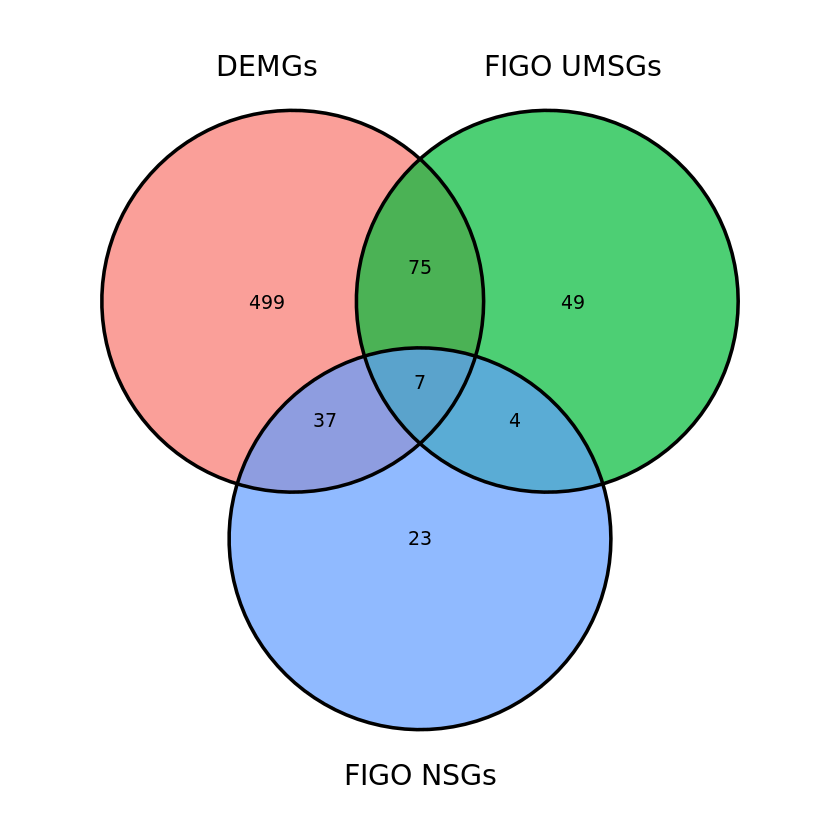

In [162]:
ggplot(data = venn_df) +
    geom_venn(
        aes(A = demg, B = univar_figo, C = network_figo),
        fill_color = venn_pal,
        fill_alpha = 0.7,
        set_names = c("DEMGs", "FIGO UMSGs", "FIGO NSGs"),
        show_percentage = FALSE
    ) +
    theme_void() +
    theme(
        text = element_text(size = text_size, family = family)
    )
ggsave(filename = paste0(dirs$figures_dir, "/gene_lists/", unified_dsets[dset_idx], "_intra_overlap.png"), last_plot(), height = vd_ht, width = vd_wd, dpi = dpi)